In [1]:
import sys
sys.path.insert(0, '/home/ashao/git/ppm_mom6/')
import importlib
import ppm_mom6
importlib.reload(ppm_mom6)
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import gsw
ppm_reconstruct = ppm_mom6.ppm_mom6.ppm_reconstructions
plm_reconstruct = ppm_mom6.ppm_mom6.plm_reconstructions

%matplotlib inline

In [2]:
datapath = '/mnt/disk2/data/OM4_025/OM4_025.temp.salt.h.nc'
lonidx = 560 ; latidx = 200
thkcello = Dataset(datapath).variables['thkcello'][0,:,latidx,lonidx]
thetao = Dataset(datapath).variables['thetao'][0,:,latidx,lonidx]
so = Dataset(datapath).variables['so'][0,:,latidx,lonidx]
nk = so.size

In [3]:
zl_depth = thkcello.cumsum(axis=0) - thkcello*0.5
zi_depth = np.append(0,thkcello.cumsum(axis=0))

In [4]:
def build_reconstructions(h0, u0):
    ppm_edge, ppm_coeffs = ppm_reconstruct(h0,u0)
    plm_edge, plm_coeffs = plm_reconstruct(h0,u0)
    # Flip the coefficients to use with Python polyval
    ppm_coeffs = np.fliplr(ppm_coeffs)
    plm_coeffs = np.fliplr(plm_coeffs)
    pcm_coeffs = np.zeros( (nk,1) )
    pcm_coeffs[:,0] = u0
    return pcm_coeffs, plm_coeffs, ppm_coeffs

In [5]:
thetao_pcm, thetao_plm, thetao_ppm = build_reconstructions(thkcello, thetao)
so_pcm, so_plm, so_ppm = build_reconstructions(thkcello, so)

In [6]:
def plot_reconstruction(zi_depth, coeffs, ls = 'k-', nint = 11):
    nk = zi_depth.size-1
    z_nondim = np.linspace(0,1,nint)
    for k in range(0,nk):
        z = np.linspace(zi_depth[k],zi_depth[k+1],nint)
        u = np.polyval(coeffs[k,:], z_nondim)
        plt.plot(u,z,ls,lw=4)
def plot_density_reconstruction(zi_depth, S_coeffs, T_coeffs, ls = 'k-', nint = 11):
    nk = zi_depth.size-1
    z_nondim = np.linspace(0,1,nint)
    for k in range(0,nk):
        z = np.linspace(zi_depth[k],zi_depth[k+1],nint)
        T = np.polyval(T_coeffs[k,:],z_nondim)
        S = np.polyval(S_coeffs[k,:],z_nondim)
        rho0 = gsw.sigma2(S,T)
        plt.plot(rho0, z, ls, lw = 2)
        plt.plot( [rho0[0],rho0[-1]], [z[0],z[-1]],'x')

In [7]:
gsw.Nsquared?

Text(0.5,1,'Piecewise Parabolic')

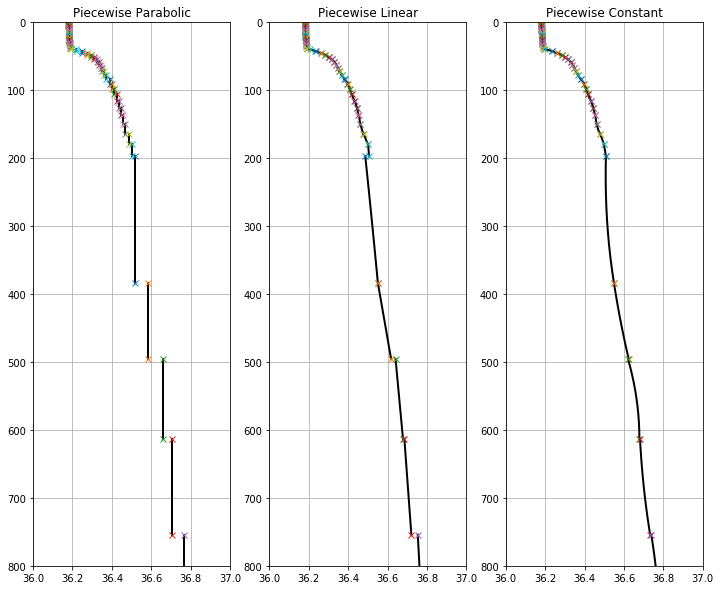

In [8]:
plt.figure(figsize = (12,10) )
ylim = (0,800)
xlim = (36,37)
plt.subplot(1,3,3)
plot_density_reconstruction(zi_depth,so_ppm, thetao_ppm)
plt.ylim( ylim ) ; plt.xlim( xlim )
plt.gca().invert_yaxis()
plt.grid()
plt.title('Piecewise Constant')

plt.subplot(1,3,2)
plot_density_reconstruction(zi_depth,so_plm, thetao_plm)
plt.ylim( ylim ) ; plt.xlim( xlim )
plt.gca().invert_yaxis()
plt.grid()
plt.title('Piecewise Linear')

plt.subplot(1,3,1)
plot_density_reconstruction(zi_depth,so_pcm, thetao_pcm)
plt.ylim( ylim ) ; plt.xlim( xlim )
plt.gca().invert_yaxis()
plt.grid()
plt.title('Piecewise Parabolic')

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

rc('font', **font)
plt.figure(figsize = (12,14) )
ylim = (0,500)
xlim = (0,3)
plt.subplot(1,3,3)
plot_reconstruction(zi_depth,thetao_ppm)
plt.ylim( ylim ) ; plt.xlim( xlim )
plt.gca().invert_yaxis()
plt.grid()
plt.title('Piecewise Parabolic')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature (C)')
plt.gca().yaxis.label.set_visible(False)

plt.subplot(1,3,2)
plot_reconstruction(zi_depth,thetao_plm)
plt.ylim( ylim ) ; plt.xlim( xlim )
plt.gca().invert_yaxis()
plt.gca().relim()
plt.gca().autoscale_view()
plt.grid()
plt.title('Piecewise Linear')
plt.xlabel('Temperature (C)')
plt.gca().yaxis.label.set_visible(False)

plt.subplot(1,3,1)
plot_reconstruction(zi_depth,thetao_pcm)
plt.ylim( ylim ) ; plt.xlim( xlim )
plt.gca().invert_yaxis()
plt.gca().relim()
plt.gca().autoscale_view()
plt.grid()
plt.title('Piecewise Constant')
plt.xlabel('Temperature (C)')

Text(0.5,0,'Temperature (C)')

/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


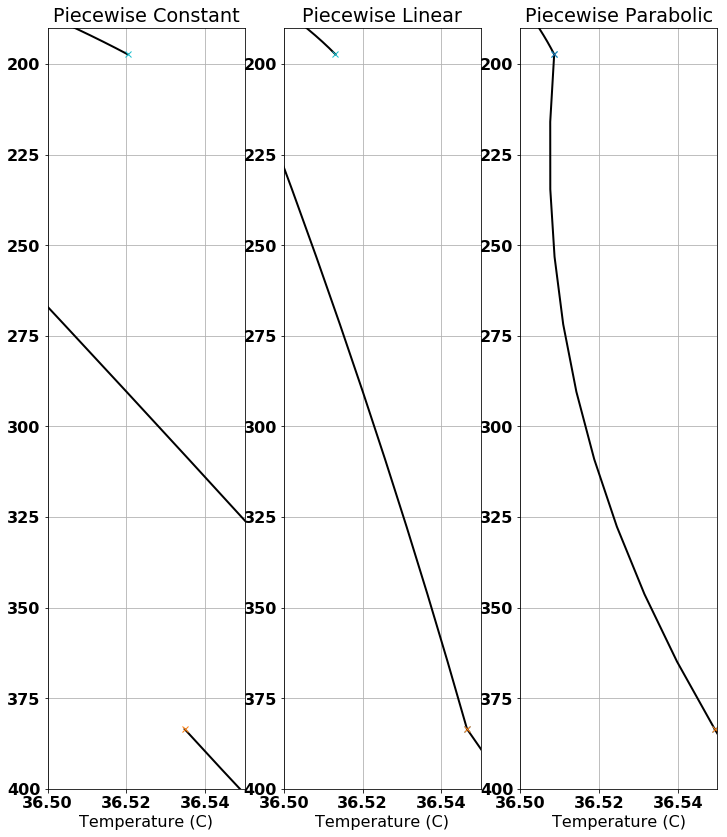

In [104]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

rc('font', **font)
plt.figure(figsize = (12,14) )
ylim = (190,400)
xlim = (36.5,36.55)
plt.subplot(1,3,3)
plot_density_reconstruction(zi_depth,so_ppm,thetao_ppm)
plt.ylim( ylim ) ; plt.xlim( xlim )
plt.gca().invert_yaxis()
plt.grid()
plt.title('Piecewise Parabolic')
plt.ylabel('Depth (m)')
plt.xlabel('Temperature (C)')
plt.gca().yaxis.label.set_visible(False)

plt.subplot(1,3,2)
plot_density_reconstruction(zi_depth,so_ppm,thetao_plm)
plt.ylim( ylim ) ; plt.xlim( xlim )
plt.gca().invert_yaxis()
plt.gca().relim()
plt.gca().autoscale_view()
plt.grid()
plt.title('Piecewise Linear')
plt.xlabel('Temperature (C)')
plt.gca().yaxis.label.set_visible(False)

plt.subplot(1,3,1)
plot_density_reconstruction(zi_depth,so_ppm,thetao_pcm)
plt.ylim( ylim ) ; plt.xlim( xlim )
plt.gca().invert_yaxis()
plt.gca().relim()
plt.gca().autoscale_view()
plt.grid()
plt.title('Piecewise Constant')
plt.xlabel('Temperature (C)')

In [92]:
plt.scatter?